In [366]:
import pandas as pd

In [367]:
enduti_usuarios_anual_2020=pd.read_csv(r'data\conjunto_de_datos_endutih_2020_csv\conjuntos_de_datos\tr_endutih_usuario_anual_2020.csv', dtype="object", encoding='latin1')

In [368]:
enduti_usuarios_anual_2021=pd.read_csv(r'data\conjunto_de_datos_endutih_2021_csv\conjuntos_de_datos\tr_endutih_usuario_anual_2021.csv', dtype="object", encoding='latin1')

In [369]:
enduti_usuarios_anual_2022=pd.read_csv(r'data\conjunto_de_datos_endutih_2022_csv\conjunto_de_datos\tr_endutih_usuarios_anual_2022.csv', dtype="object", encoding='latin1')

In [370]:
enduti_usuarios_anual_2023=pd.read_csv(r'data\conjunto_de_datos_endutih_2023_csv\conjunto_de_datos\tr_endutih_usuarios_anual_2023.csv', dtype="object", encoding='latin1')

In [371]:
import pandas as pd

# Define the age bins and labels
age_bins = [17, 24, 30, 35, 45, 55, 65, float('inf')]
age_labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g']

# List of dataframes and the years corresponding to them
dataframes = [
    ('2020', enduti_usuarios_anual_2020),
    ('2021', enduti_usuarios_anual_2021),
    ('2022', enduti_usuarios_anual_2022),
    ('2023', enduti_usuarios_anual_2023)
]

# Arrays for each zone
noroeste = [2, 3, 8, 10, 25, 26]
noreste = [5, 19, 24, 28]
occidente_bajio = [1, 6, 11, 14, 16, 18, 22, 32]
cdmx = [9]
centro_sur_oriente = [13, 15, 21, 23, 29, 30]
sur = [4, 7, 12, 17, 20, 27, 31]

# Dictionary to store transformed dataframes
transformed_dataframes = {}

for year, df in dataframes:
    # Convert 'EDAD' to numeric
    df['EDAD'] = pd.to_numeric(df['EDAD'])
    
    # Create age groups
    df['GRUPO_EDAD'] = pd.cut(df['EDAD'], bins=age_bins, labels=age_labels)
    
    # Convert 'FAC_PER' to numeric
    df['FAC_PER'] = pd.to_numeric(df['FAC_PER'])
    
    # Map 'ENT' to 'ZONA' using conditional checks
    def assign_zone(ent):
        if ent in noroeste:
            return 'noroeste'
        elif ent in noreste:
            return 'noreste'
        elif ent in occidente_bajio:
            return 'occidente_y_bajio'
        elif ent in cdmx:
            return 'ciudad_de_mexico'
        elif ent in centro_sur_oriente:
            return 'centro_sur_y_oriente'
        elif ent in sur:
            return 'sur'
        else:
            return 'desconocido'  # In case an entity doesn't match any zone
    df['ENT'] = pd.to_numeric(df['ENT'])
    # Apply the function to create the 'ZONA' column
    df['ZONA'] = df['ENT'].apply(assign_zone)
    
    # Check if the column name for the year is 'P7_19' or 'P7_21'
    p7_column = 'P7_21' if year == '2023' else 'P7_19'
    
    # Group by relevant columns including the p7 column
    grouped_df = df.groupby(['GRUPO_EDAD', 'ZONA', 'ESTRATO', p7_column], observed=False).agg({'FAC_PER': 'sum'}).reset_index()
    
    # Pivot the dataframe to have the p7 column values as separate columns
    pivoted_df = grouped_df.pivot_table(
        index=['GRUPO_EDAD', 'ZONA', 'ESTRATO'], 
        columns=p7_column, 
        values='FAC_PER', 
        fill_value=0,
        observed=False
    ).reset_index()
    
    # Rename columns for clarity
    pivoted_df.columns = ['GRUPO_EDAD', 'ZONA', 'ESTRATO', 'FAC_PER_P7_19_1',  'FAC_PER_P7_19_2']
    
    # Store the transformed dataframe in the dictionary
    transformed_dataframes[year] = pivoted_df

    # Display the shape of the transformed dataframe for each year
    print(f"Transformed dataframe for {year}: shape {pivoted_df.shape}")


Transformed dataframe for 2020: shape (168, 5)
Transformed dataframe for 2021: shape (168, 5)
Transformed dataframe for 2022: shape (168, 5)
Transformed dataframe for 2023: shape (168, 5)


In [372]:
transformed_dataframes['2020'].head()

,GRUPO_EDAD,ZONA,ESTRATO,FAC_PER_P7_19_1,FAC_PER_P7_19_2
0,a,centro_sur_y_oriente,1,169654.0,626353.0
1,a,centro_sur_y_oriente,2,838066.0,1496803.0
2,a,centro_sur_y_oriente,3,263340.0,186291.0
3,a,centro_sur_y_oriente,4,213893.0,111366.0
4,a,ciudad_de_mexico,1,0.0,0.0


In [373]:
import pandas as pd
import matplotlib.pyplot as plt

# List of years
years = ['2020', '2021', '2022', '2023']

# Merge all the dataframes and add a year column
merged_dfs = []

for year, df in transformed_dataframes.items():
    df['YEAR'] = year
    merged_dfs.append(df)

# Concatenate all dataframes into a single dataframe
merged_df = pd.concat(merged_dfs)

In [374]:
# Pivot the merged dataframe to have years as columns
pivoted_df = merged_df.pivot_table(
    index=['GRUPO_EDAD', 'ZONA', 'ESTRATO'],
    columns='YEAR',
    values='FAC_PER_P7_19_1',
    fill_value=0,
    observed=False
).reset_index()

# Filter rows where FAC_PER_P7_19_1 > 0 for all years (2020, 2021, 2022, and 2023)
filtered_df = pivoted_df[
    (pivoted_df['2020'] > 0) &
    (pivoted_df['2021'] > 0) &
    (pivoted_df['2022'] > 0) &
    (pivoted_df['2023'] > 0)
].copy()

filtered_df


YEAR,GRUPO_EDAD,ZONA,ESTRATO,2020,2021,2022,2023
0,a,centro_sur_y_oriente,1,169654.0,167774.0,196203.0,172901.0
1,a,centro_sur_y_oriente,2,838066.0,960740.0,1073003.0,1185173.0
2,a,centro_sur_y_oriente,3,263340.0,317399.0,259528.0,438072.0
3,a,centro_sur_y_oriente,4,213893.0,188997.0,183405.0,165335.0
5,a,ciudad_de_mexico,2,103215.0,181300.0,275124.0,218162.0
...,...,...,...,...,...,...,...
163,g,occidente_y_bajio,4,7840.0,20058.0,53221.0,45001.0
164,g,sur,1,5139.0,2398.0,3591.0,4025.0
165,g,sur,2,13163.0,12101.0,25409.0,29830.0
166,g,sur,3,11211.0,9744.0,6637.0,20603.0


In [375]:
filtered_df.loc[:,'2021_diff'] = filtered_df['2021'] - filtered_df['2020']
filtered_df.loc[:,'2022_diff'] = filtered_df['2022'] - filtered_df['2021']
filtered_df.loc[:,'2023_diff'] = filtered_df['2023'] - filtered_df['2022']

In [376]:
filtered_df['total_increment'] = filtered_df['2023_diff'] + filtered_df['2022_diff'] + filtered_df['2021_diff']
top_10_df=filtered_df.sort_values('total_increment', ascending=False).head(10)

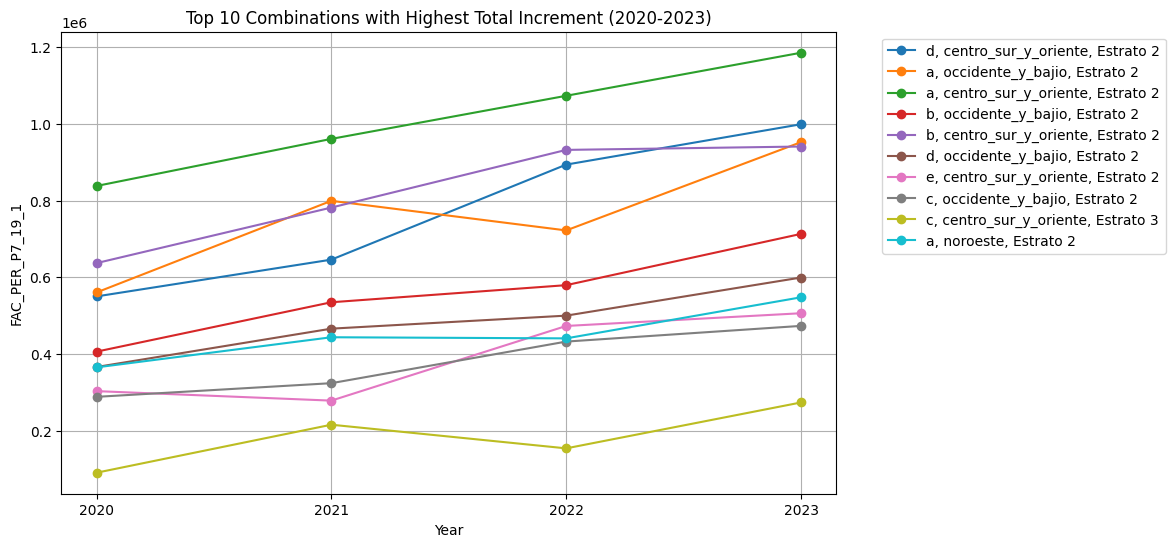

In [377]:
# Plotting a line graph for the top 10 entries
plt.figure(figsize=(10, 6))

for idx, row in top_10_df.iterrows():
    plt.plot(['2020', '2021', '2022', '2023'], [row['2020'], row['2021'], row['2022'], row['2023']], marker='o', label=f"{row['GRUPO_EDAD']}, {row['ZONA']}, Estrato {row['ESTRATO']}")

plt.xlabel('Year')
plt.ylabel('FAC_PER_P7_19_1')
plt.title('Top 10 Combinations with Highest Total Increment (2020-2023)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [378]:
filtered_df.to_csv('data/out/cambios_compradores_2020_2023.csv', index=False)